### Import things

In [15]:
# Numerical
import numpy as np

# Classifiers
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from collections import defaultdict

# Datasets
from sklearn.datasets import load_wine

# Graphics
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
%matplotlib inline

# Audio notificaions
from IPython.display import Audio
sound_file = '/System/Library/Sounds/Hero.aiff'

### Load datasets

In [16]:
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]
class_names = dataset["target_names"]

## Exercize 2.1

### 1)Answer the following questions:
* How many records are available?
* Are there missing values?
* How many elements does each class contain?

In [17]:
print(f"There are {X.shape[0]} records with {X.shape[1]} features")
print()

missing_values = X[X == None]

print(f"There are {missing_values.size} missing values") if missing_values.size > 0 else print("There are no missing values")
print()

# This functions takes as parameter the data["target_names"] numpy array of scikit learn dataset,
# it contains the name of the various classes,
# and data["target"], a numpy array with the target classes.
# The function return the number of elements in every class.
def count_elements_in_class(classes, target):
    for class_, _ in enumerate(classes):
        print(f"There are {target[target==class_].shape[0]} in class {class_}")
        
count_elements_in_class(class_names, y)

There are 178 records with 13 features

There are no missing values

There are 59 in class 0
There are 71 in class 1
There are 48 in class 2


### 2) Create a DecisionTreeClassifier object with the default configuration

In [18]:
DecTree_clf = DecisionTreeClassifier().fit(X, y)

### 3) Visualize results

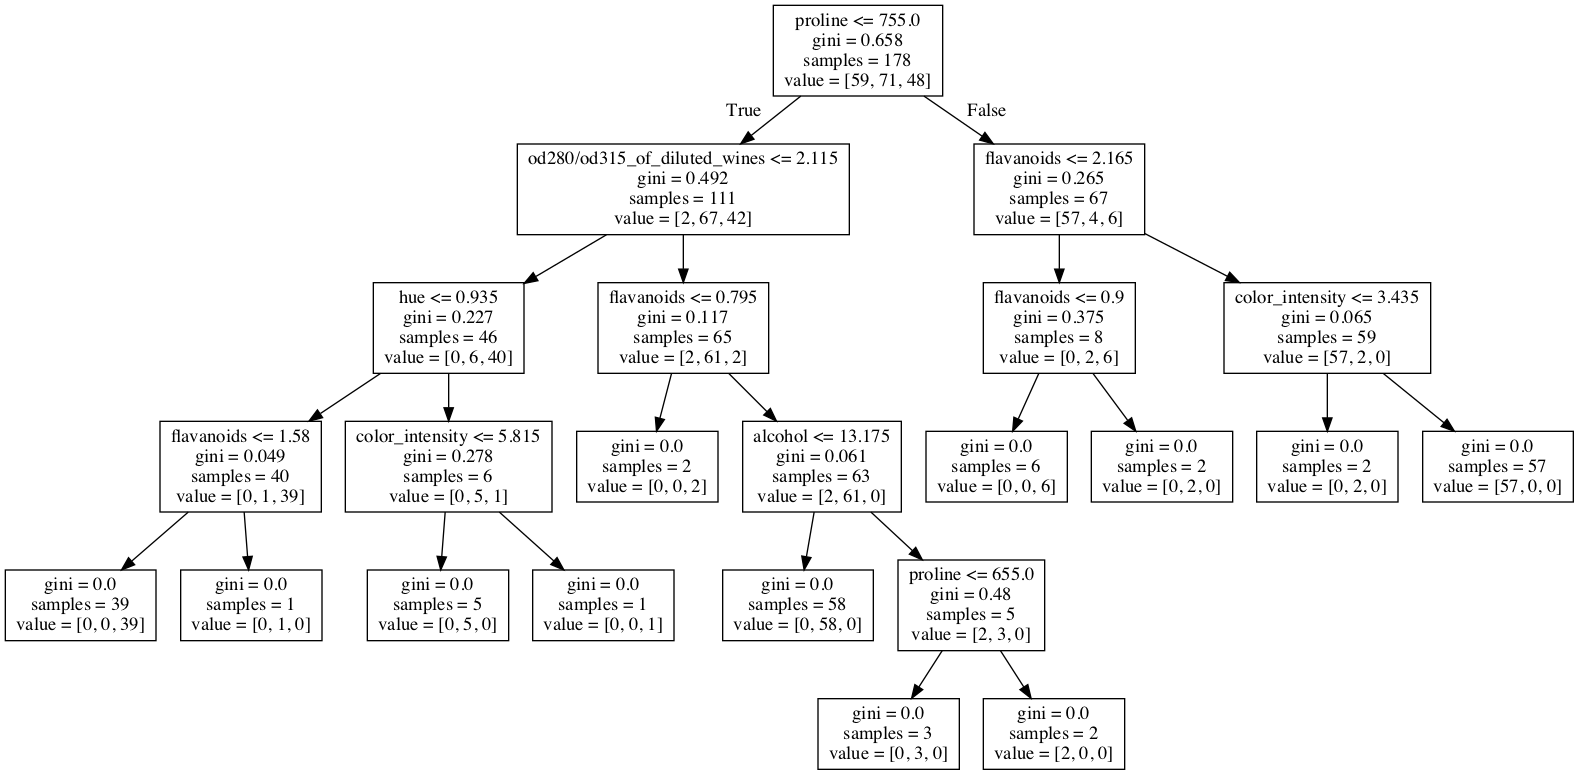

In [19]:
# here, features is a list of names, one for each feature
# this makes the resulting tree visualization more comprehensible
def visualizeTree(model, features):
    dot_code = export_graphviz(model, feature_names=features)
    graph = pydot.graph_from_dot_data(dot_code)
    display(Image(graph[0].create_png()))
    
visualizeTree(DecTree_clf, feature_names)

### 4) Predictions of the classifier

In [20]:
y_pred = DecTree_clf.predict(X)

count_elements_in_class(class_names, y_pred)
print()

print(f"The accuracy score is: {accuracy_score(y, y_pred)}")
print()

print("The result has a high accuracy")
print("I'm training and testing on the same data, ")
print("the model can be overfitted because it's optimized for a specific dataset, ")
print("and may not perform as well with new data")
print()

print("The confusion matrix is ideal: " )
print(f"{confusion_matrix(y, y_pred)}")

There are 59 in class 0
There are 71 in class 1
There are 48 in class 2

The accuracy score is: 1.0

The result has a high accuracy
I'm training and testing on the same data, 
the model can be overfitted because it's optimized for a specific dataset, 
and may not perform as well with new data

The confusion matrix is ideal: 
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


### 5) Split dataset into a training set and a test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def printSize(train, test):
    print(f"Size of training data {train.shape[0]}")
    print(f"Size of testing data {test.shape[0]}")
          
printSize(X_train, X_test)
print()

print(f"Labels in training data: ")
count_elements_in_class(class_names, y_train)
print()

print(f"Labels in testing data: ")
count_elements_in_class(class_names, y_test)
print()

Size of training data 142
Size of testing data 36

Labels in training data: 
There are 43 in class 0
There are 62 in class 1
There are 37 in class 2

Labels in testing data: 
There are 16 in class 0
There are 9 in class 1
There are 11 in class 2



### 6) Train a new model using (X_train, y_train)

In [22]:
DecTree_clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = DecTree_clf.predict(X_test)

print(f"The accuracy score is: {accuracy_score(y_test, y_pred)}")
print()

print("Labels in predicted data:")
count_elements_in_class(class_names, y_pred)
print()

print("The confusion matrix is: " )
print(f"{confusion_matrix(y_test, y_pred)}")
print()

print("This shows that we shouldn't overfit the model toward our dataset otherwise it won't be able to classify other datasets correctely")
print()

print(f"Precision score of the 3 classes: {precision_score(y_test, y_pred, average=None)}")
print(f"Recall score of the 3 classes: {recall_score(y_test, y_pred, average=None)}")
print(f"F1 score of the 3 classes: {f1_score(y_test, y_pred, average=None)}")
print(f"Average f1 score with average='micro'-> {f1_score(y_test, y_pred, average='micro')}")
print()
      
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

The accuracy score is: 0.9722222222222222

Labels in predicted data:
There are 15 in class 0
There are 10 in class 1
There are 11 in class 2

The confusion matrix is: 
[[15  1  0]
 [ 0  9  0]
 [ 0  0 11]]

This shows that we shouldn't overfit the model toward our dataset otherwise it won't be able to classify other datasets correctely

Precision score of the 3 classes: [1.  0.9 1. ]
Recall score of the 3 classes: [0.9375 1.     1.    ]
F1 score of the 3 classes: [0.96774194 0.94736842 1.        ]
Average f1 score with average='micro'-> 0.9722222222222222

              precision    recall  f1-score   support

     class_0     1.0000    0.9375    0.9677        16
     class_1     0.9000    1.0000    0.9474         9
     class_2     1.0000    1.0000    1.0000        11

    accuracy                         0.9722        36
   macro avg     0.9667    0.9792    0.9717        36
weighted avg     0.9750    0.9722    0.9725        36



### 7) Perform a “grid search”
  Define a set of possible configurations and, for each configuration, build a classifier.

{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best', 'accuracy': 1.0}


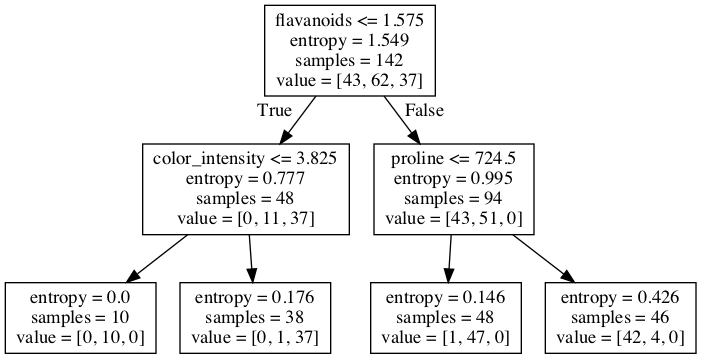

In [23]:
accuracies = []

params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"],
    "criterion": ["gini", "entropy"],
}

def tuneParameters(parameters, train, trueClasses, validate, validateLabels, accuraciesList):
    for i, config in enumerate(ParameterGrid(parameters)):
        DecTree_clf = DecisionTreeClassifier(**config).fit(train, trueClasses)
        y_pred = DecTree_clf.predict(validate)
        accuracy = accuracy_score(validateLabels, y_pred)

    #     print(f"The accuracy is: {accuracy}")
    #     print(config)

        accuraciesList.append(config)
        accuraciesList[i]['accuracy'] = accuracy


tuneParameters(params, X_train, y_train, X_test, y_test, accuracies)

# print()


def findMaxAccuracy(accuraciesList):
    max_accuracy = {'criterion': '', 'max_depth': None, 'splitter': '', 'accuracy': 0}
    
    for ac in accuraciesList:
        
        if ac['accuracy'] >= max_accuracy['accuracy']:
        
            if ac['max_depth'] == None:
                #print(ac)
                max_accuracy = ac

            elif max_accuracy['max_depth'] == None and ac['max_depth'] != None:
                #print(ac)
                max_accuracy = ac
                
            elif max_accuracy['max_depth'] > ac['max_depth']:
                #print(ac)
                max_accuracy = ac
            
            
            

    return max_accuracy


#print()    
max_accuracy = findMaxAccuracy(accuracies)
print(max_accuracy)
DecTree_clf = DecisionTreeClassifier(**{key:value for key, value in max_accuracy.items() if key!='accuracy'}).fit(X_train, y_train)
visualizeTree(DecTree_clf, feature_names)

### 8)  Since we used our test data to select the model, you may be overfitting on the test data
Use *k-fold cross-validation*

Best accuracy for each fold: 
{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random', 'accuracy': 1.0}

{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best', 'accuracy': 0.9310344827586207}

{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random', 'accuracy': 1.0}

{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best', 'accuracy': 1.0}

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random', 'accuracy': 0.8928571428571429}


Best accuracy overall: 
{'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random', 'accuracy': 1.0}


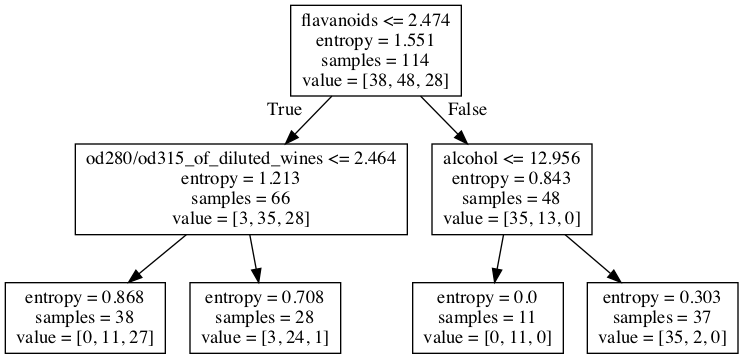


Test the model on new data (the testing set)
The accuracy is: 0.8055555555555556


In [24]:
globalAccuracies = []

params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"],
    "criterion": ["gini", "entropy"],
}

# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
#   be seen by the classifier during the training/validation phases)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2)
kf = KFold(5)    # 5-fold cross-validation


# kf.split(...)  returns a list of tuples,
# where the first value of each tuple are the indices that should be used for training, 
# the second are the indices used for validation
print("Best accuracy for each fold: ")
for train_indices, validation_indices in kf.split(X_train_valid):
    accuracies = []
    
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]
    
    tuneParameters(params, X_train, y_train, X_valid, y_valid, accuracies)
    max_k_accuracy = findMaxAccuracy(accuracies)
    globalAccuracies.append(max_k_accuracy)
    print(max_k_accuracy)
    print()

print()
print("Best accuracy overall: ")
globalMaxAccuracy = findMaxAccuracy(globalAccuracies)
print(globalMaxAccuracy)
DecTree_clf = DecisionTreeClassifier(**{key:value for key, value in globalMaxAccuracy.items() if key!='accuracy'}).fit(X_train, y_train)
visualizeTree(DecTree_clf, feature_names)

print()
print("Test the model on new data (the testing set)")
y_pred = DecTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy is: {accuracy}")
#visualizeTree(DecTree_clf, feature_names)

### Optional
### 9)

## Exercize 2.2

### 1) Load the synthetic dataset and plot the dataset on a 2D plane
How do you expect a decision tree to approach data distributed in this way?

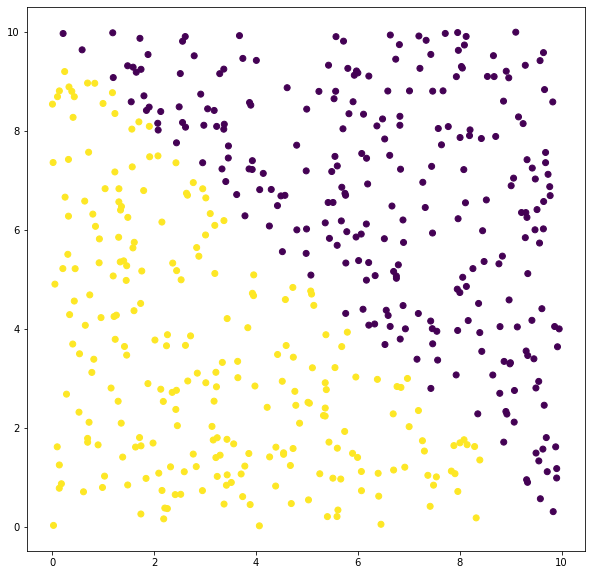

In this case, even if the relation between x and y is linear, 
I can't use decision trees because the 'splits' are ortogonal to the current axis and parralle to the other,
while in this case I need something similar to 'x+y<k' with k=constant for splits,
such as 10 in this example: if x+y<10 -> true, else -> false.


In [30]:
def loadDataset(filename):
    with open(filename) as f:
        header = f.readline().strip().split(',')
    return (np.loadtxt(filename, delimiter=',', skiprows=1), header)


def printPoints(all_Points, all_Labels, sizeX, sizeY):
    fig, ax = plt.subplots(figsize=(sizeX, sizeY))
    ax.scatter(all_Points[:,0], all_Points[:,1], c = all_Labels)
    plt.show()
    

allData, header = loadDataset("./2d-synthetic.csv")
points = allData[:,:-1]
class_labels = allData[:,-1]
features_name = header[:-1]

printPoints(points, class_labels, 10, 10)

print("In this case, even if the relation between x and y is linear, ")
print("I can't use decision trees because the 'splits' are ortogonal to the current axis and parralle to the other,")
print("while in this case I need something similar to 'x+y<k' with k=constant for splits,")
print("such as 10 in this example: if x+y<10 -> true, else -> false.")

### 2) Build a “default” decision tree using the entire dataset, then visualize the learned model.
What is the tree learning, and why?

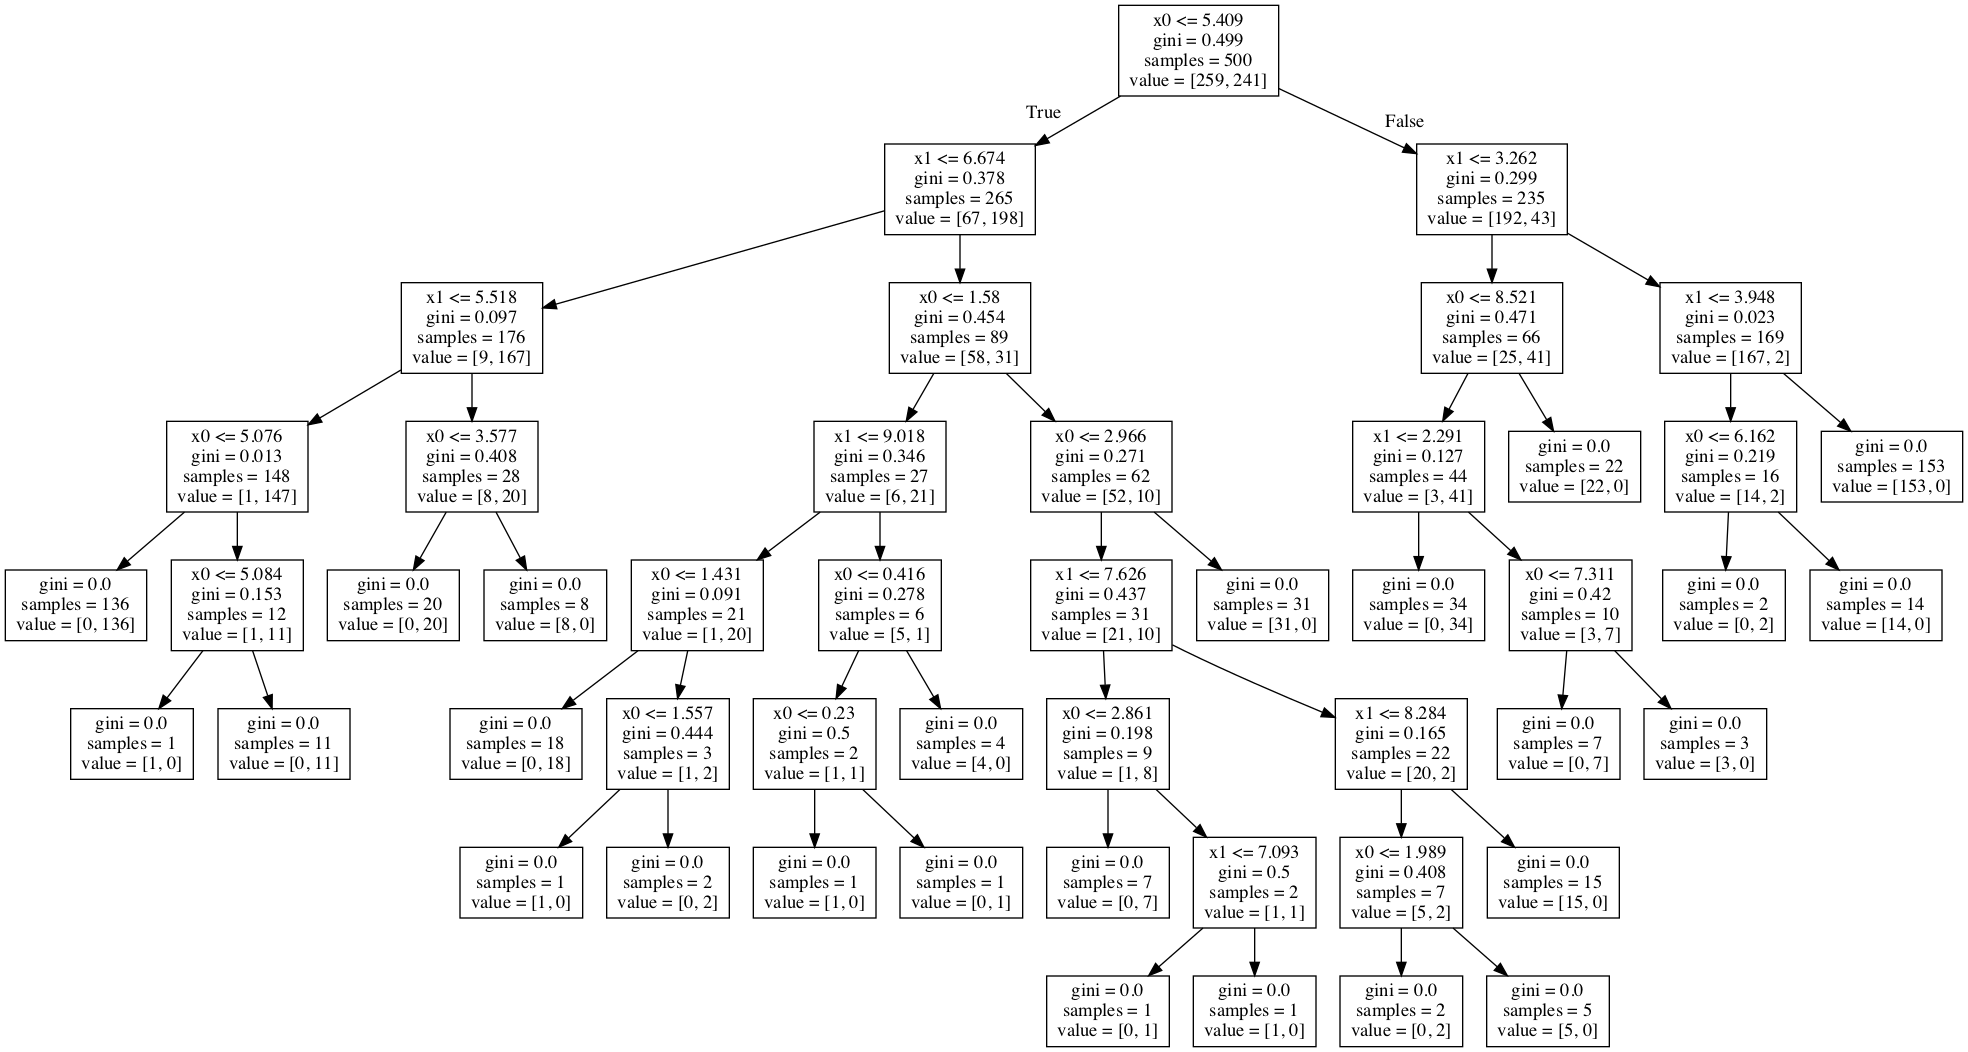

1.0

In [35]:
DecTree_clf = DecisionTreeClassifier().fit(points, class_labels)
visualizeTree(DecTree_clf, features_name)
pred = DecTree_clf.predict(points)
accuracy_score(class_labels ,pred)